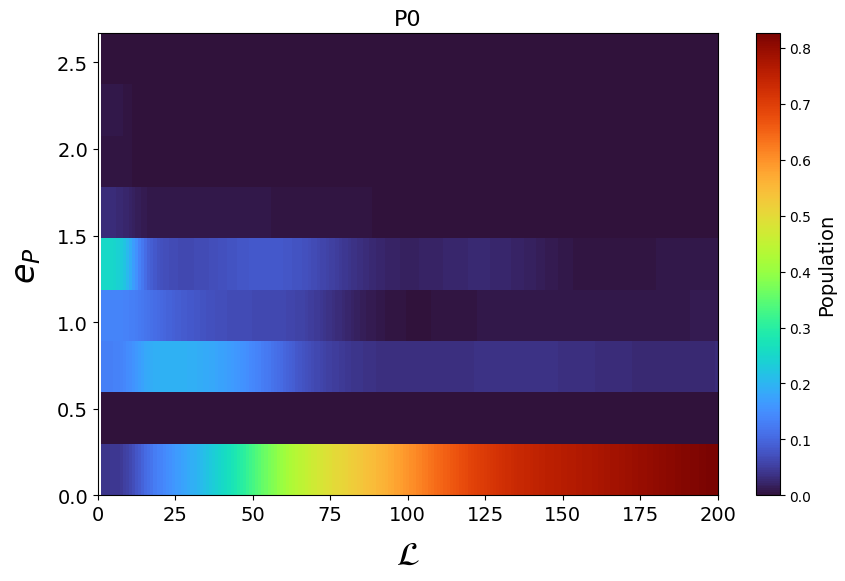

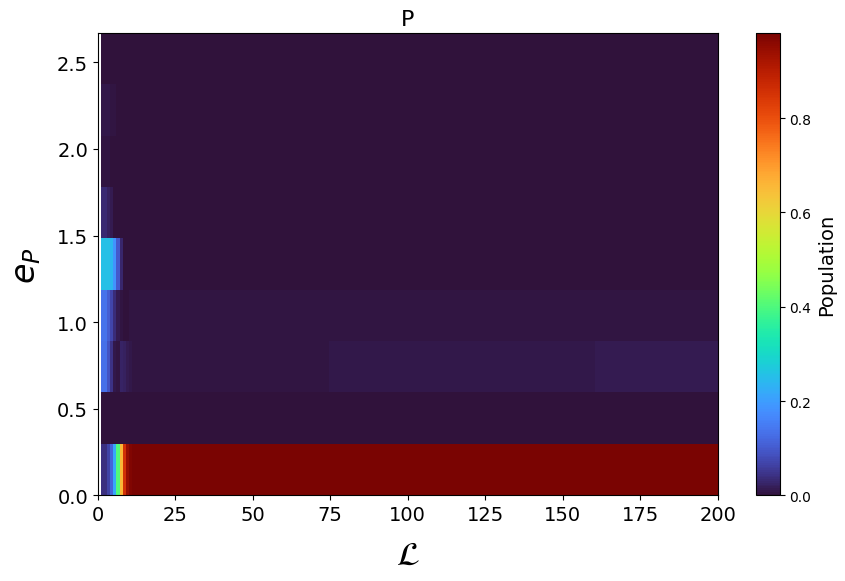

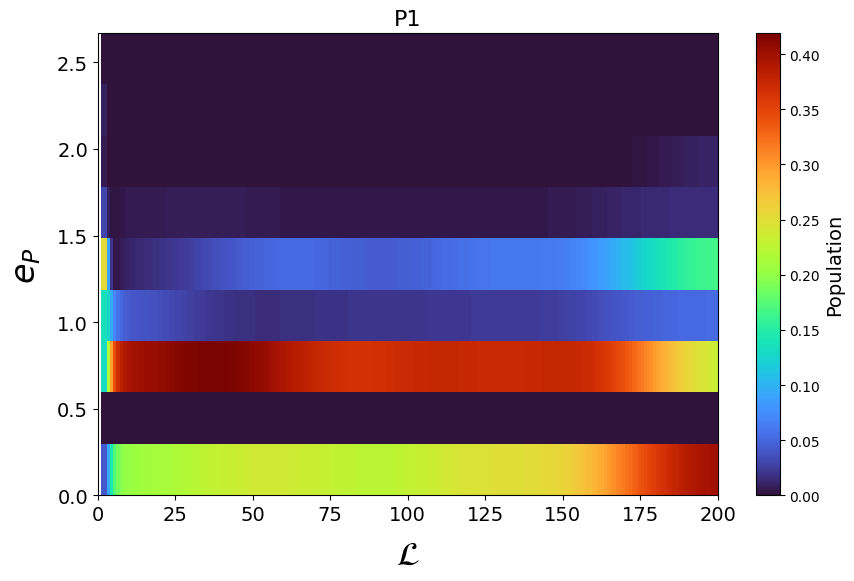

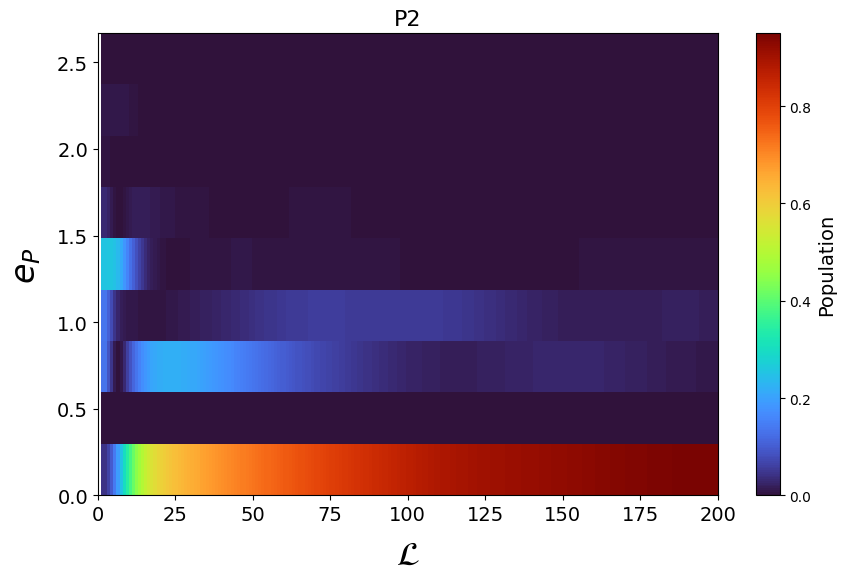

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.sparse import eye as speye
import nbimporter
from CDFQA_class import CDFQA

# Initialize CDFQA object
cdfqa = CDFQA()

# Initialization
N = 6
J = -1
hz = -0.4
hx = -0.4
perBC = 1  # Periodic boundary conditions
CD = ['k', "#0072BD", "#D95319", "#7E2F8E", 'g', 'c', 'y']
pool = ['I', 'Y', 'ZY', 'YZ']
FalqonCD = 0  # 0 for original FALQON
Colorcount = 2
alpha = 1
beta = 1
gamma = 1

# Building Hamiltonian
HP = (cdfqa.ham_nn(N, 3, 3, J, perBC) + 
      cdfqa.ham_onsite(N, 3, hz) + 
      cdfqa.ham_onsite(N, 1, hx))

# Eigen decomposition
D, EV = eigh(HP)
HM = cdfqa.ham_onsite(N, 1, 1)
HCD0 = speye(2**N, dtype=np.complex128)
HCD = cdfqa.ham_onsite(N, 2, 1)
HCD1 = cdfqa.ham_nn(N, 2, 3, 1, perBC)
HCD2 = cdfqa.ham_nn(N, 2, 1, 1, perBC)

# Initial state (normalized)
psi_initial = np.ones(2**N, dtype=np.complex128) / np.sqrt(2**N)

# Parameters
Layers = 200
dt = 0.01

# Population calculations
pop0 = cdfqa.cdfqa_population_vs_cir_depth(N, HP, HM, HCD0, psi_initial, Layers, dt)
pop = cdfqa.cdfqa_population_vs_cir_depth(N, HP, HM, HCD, psi_initial, Layers, dt)
pop1 = cdfqa.cdfqa_population_vs_cir_depth(N, HP, HM, HCD1, psi_initial, Layers, dt)
pop2 = cdfqa.cdfqa_population_vs_cir_depth(N, HP, HM, HCD2, psi_initial, Layers, dt)

# Reshape and setup for plotting
sz = pop0.shape
T = Layers

D1 = D - D[0]

# ymax determination
ymax = int(np.ceil(np.max(D1)))
if ymax % 2 == 1:
    ymax += 1

# Prepare to accumulate population data in P0, P, P1, P2
P0 = np.zeros((ymax//2 + 1, T), dtype=np.complex128)
P = np.zeros((ymax//2 + 1, T), dtype=np.complex128)
P1 = np.zeros((ymax//2 + 1, T), dtype=np.complex128)
P2 = np.zeros((ymax//2 + 1, T), dtype=np.complex128)

n = 1
for i in range(len(D1)):
    if 2 * (n - 1) <= D1[i] < 2 * n:
        P0[n-1, :] += pop0[i, :]
        P[n-1, :] += pop[i, :]
        P1[n-1, :] += pop1[i, :]
        P2[n-1, :] += pop2[i, :]
    else:
        n += 1

# Plotting function using imshow for 2D view
def plot_population_2d(X, Y, P, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create heatmap using imshow
    im = ax.imshow(P.real, extent=[X.min(), X.max(), Y.min(), Y.max()], 
                   origin='lower', aspect='auto', cmap='turbo')

    # Set axis limits equivalent to MATLAB's axis command
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 16 / 6)

    # Add color bar
    cbar = fig.colorbar(im)
    cbar.set_label('Population', fontsize=14)

    # Labels and Title
    ax.set_xlabel(r'$\cal L$', fontsize=24, labelpad=10)
    ax.set_ylabel(r'$e_P$', fontsize=24, labelpad=10)
    plt.title(title, fontsize=16)

    # Customize the appearance
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()

# Generate mesh for plotting
X, Y = np.meshgrid(np.arange(1, T + 1), np.linspace(0, ymax / 6, ymax // 2 + 1))

# Plot each population using the 2D method
plot_population_2d(X, Y, P0, 'P0')
plot_population_2d(X, Y, P, 'P')
plot_population_2d(X, Y, P1, 'P1')
plot_population_2d(X, Y, P2, 'P2')


In [4]:
D.shape

(64,)